In [1]:
# import some basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read dataset
dataset = pd.read_csv('spam.csv')
dataset.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
dataset.shape

(5572, 2)

## Data Cleaning

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [5]:
# Renaming the columns
dataset.rename(columns={
    'v1': 'target',
    'v2': 'text'
}, inplace=True)
dataset.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
# LabelEncoder used to transform non-numerical labels to numerical labels.
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

dataset['target'] = encoder.fit_transform(dataset['target'])
dataset.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
# check the missing value
dataset.isnull().sum()

target    0
text      0
dtype: int64

In [8]:
# check the duplicates value
dataset.duplicated().sum()

403

In [9]:
# remove the duplicates value
dataset = dataset.drop_duplicates(keep='first')
dataset.duplicated().sum()

0

## EDA

In [10]:
dataset['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

([<matplotlib.patches.Wedge at 0x29b0f2e6490>,
 [Text(-1.0144997251399075, 0.4251944351600247, 'ham'),
  Text(1.014499764949479, -0.4251943401757036, 'spam')],
 [Text(-0.5533634864399495, 0.23192423736001344, '87.37'),
  Text(0.5533635081542612, -0.23192418555038377, '12.63')])

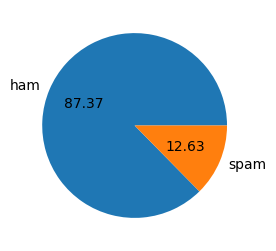

In [11]:
plt.figure(figsize=(5,3))
plt.pie(dataset['target'].value_counts(), labels=['ham', 'spam'], autopct='%0.2f')

### Data is Imbalanced

In [12]:
dataset['num_characters'] = dataset['text'].apply(len)
dataset.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [13]:
# number of words
import nltk
nltk.download('punkt')
dataset['num_words'] = dataset['text'].apply(lambda x:len(nltk.word_tokenize(x)))
dataset.head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Bhavik\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [14]:
# number of sentences
dataset['num_sentences'] = dataset['text'].apply(lambda x: len(nltk.sent_tokenize(x)))
dataset.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


<AxesSubplot: xlabel='num_characters', ylabel='Count'>

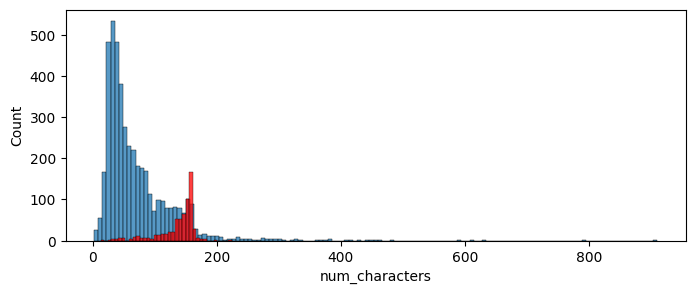

In [15]:
import seaborn as sns
plt.figure(figsize=(8,3))
sns.histplot(dataset[dataset['target'] == 0]['num_characters'])
sns.histplot(dataset[dataset['target'] == 1]['num_characters'],color='red')

<AxesSubplot: xlabel='num_words', ylabel='Count'>

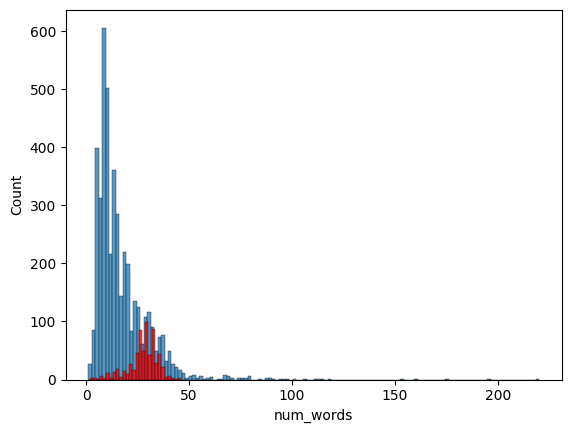

In [16]:
sns.histplot(dataset[dataset['target'] == 0]['num_words'])
sns.histplot(dataset[dataset['target'] == 1]['num_words'],color='red')

<Figure size 800x700 with 0 Axes>

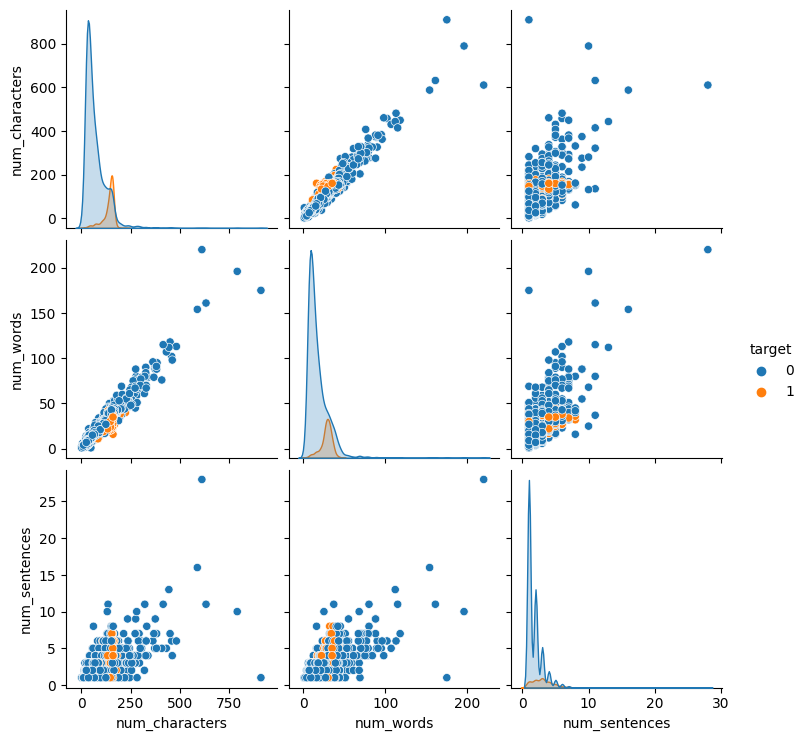

In [17]:
plt.figure(figsize=(8,7))
sns.pairplot(dataset,hue='target')

## Data Preprocessing
* Lower case
* Tokenization
* Removing special characters
* Removing stop words and punctuation
* Stemming

In [18]:
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer

ps = PorterStemmer()

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
            
    return " ".join(y)

In [19]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [20]:
dataset['transform_text'] = dataset['text'].apply(transform_text)
dataset.head()

,target,text,num_characters,num_words,num_sentences,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


###  Model Building

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [22]:
X = tfidf.fit_transform(dataset['transform_text']).toarray()
y = dataset['target'].values

In [23]:
X.shape, y.shape

((5169, 3000), (5169,))

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [25]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [26]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [27]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(f'Accuracy Score: {accuracy_score(y_test,y_pred1)*100:.2f}%')
print(f'Confsion Matrix: {confusion_matrix(y_test,y_pred1)}')
print(f'Precision Score: {precision_score(y_test,y_pred1):.3f}')

Accuracy Score: 86.94%
Confsion Matrix: [[788 108]
 [ 27 111]]
Precision Score: 0.507


In [28]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(f'Accuracy Score: {accuracy_score(y_test,y_pred2)*100:.2f}%')
print(f'Confsion Matrix: {confusion_matrix(y_test,y_pred2)}')
print(f'Precision Score: {precision_score(y_test,y_pred2):.3f}')

Accuracy Score: 97.10%
Confsion Matrix: [[896   0]
 [ 30 108]]
Precision Score: 1.000


In [29]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(f'Accuracy Score: {accuracy_score(y_test,y_pred3)*100:.2f}%')
print(f'Confsion Matrix: {confusion_matrix(y_test,y_pred3)}')
print(f'Precision Score: {precision_score(y_test,y_pred3):.3f}')

Accuracy Score: 98.36%
Confsion Matrix: [[895   1]
 [ 16 122]]
Precision Score: 0.992


In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [32]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [33]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [35]:
accuracy_scores = []
precision_scores = []

def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print(f'For: {name}')
    print(f'Accuracy: {current_accuracy}')
    print(f'Precision: {current_precision}')
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For: SVC
Accuracy: 0.9758220502901354
Precision: 0.9747899159663865
For: KN
Accuracy: 0.9052224371373307
Precision: 1.0
For: NB
Accuracy: 0.9709864603481625
Precision: 1.0
For: DT
Accuracy: 0.9274661508704062
Precision: 0.8118811881188119
For: LR
Accuracy: 0.9584139264990329
Precision: 0.9702970297029703
For: RF
Accuracy: 0.9748549323017408
Precision: 0.9827586206896551
For: AdaBoost
Accuracy: 0.960348162475822
Precision: 0.9292035398230089
For: BgC
Accuracy: 0.9574468085106383
Precision: 0.8671875
For: ETC
Accuracy: 0.9748549323017408
Precision: 0.9745762711864406
For: GBDT
Accuracy: 0.9477756286266924
Precision: 0.92
For: xgb
Accuracy: 0.971953578336557
Precision: 0.943089430894309


In [36]:
performance_df = pd.DataFrame({
    'Algorithm':clfs.keys(),
    'Accuracy':accuracy_scores,
    'Precision':precision_scores}
).sort_values('Precision',ascending=False)
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.974855,0.982759
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.958414,0.970297
10,xgb,0.971954,0.943089
6,AdaBoost,0.960348,0.929204
9,GBDT,0.947776,0.920000
7,BgC,0.957447,0.867188


In [39]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.905222
1,NB,Accuracy,0.970986
2,RF,Accuracy,0.974855
3,SVC,Accuracy,0.975822
4,ETC,Accuracy,0.974855
5,LR,Accuracy,0.958414
6,xgb,Accuracy,0.971954
7,AdaBoost,Accuracy,0.960348
8,GBDT,Accuracy,0.947776
9,BgC,Accuracy,0.957447


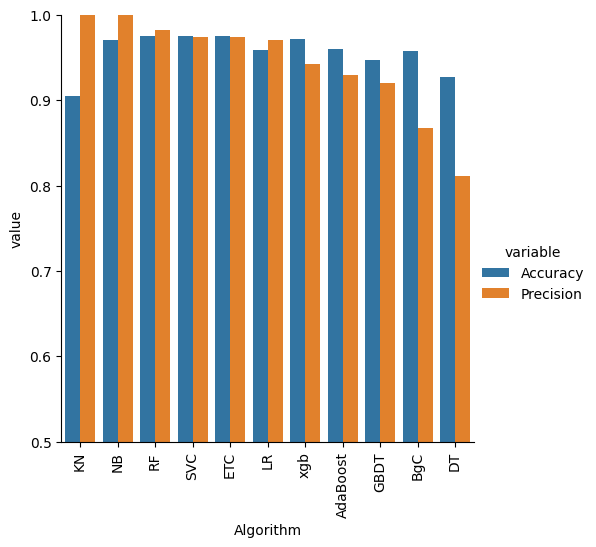

In [45]:
sns.catplot(x = 'Algorithm', y='value', hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()